load data...
training regressor...
score= -0.0875922063525425
plotting feature importance...
sfx.pitch_after_max_to_before_max_energy_ratio    0.046506
lowlevel.barkbands_flatness_db.min                0.036003
tonal.chords_changes_rate                         0.031083
lowlevel.spectral_flatness_db.min                 0.029138
lowlevel.pitch.mean                               0.027010
tonal.hpcp.median                                 0.022772
tonal.hpcp_entropy.max                            0.022025
lowlevel.dissonance.dvar                          0.018339
lowlevel.melbands_crest.median                    0.016984
lowlevel.melbands_skewness.median                 0.016246
lowlevel.erbbands_kurtosis.min                    0.015971
rhythm.beats_loudness.max                         0.015097
lowlevel.pitch.dmean2                             0.014878
tonal.chords_number_rate                          0.014367
rhythm.beats_loudness.mean                        0.014226
lowlevel.pitch.var    

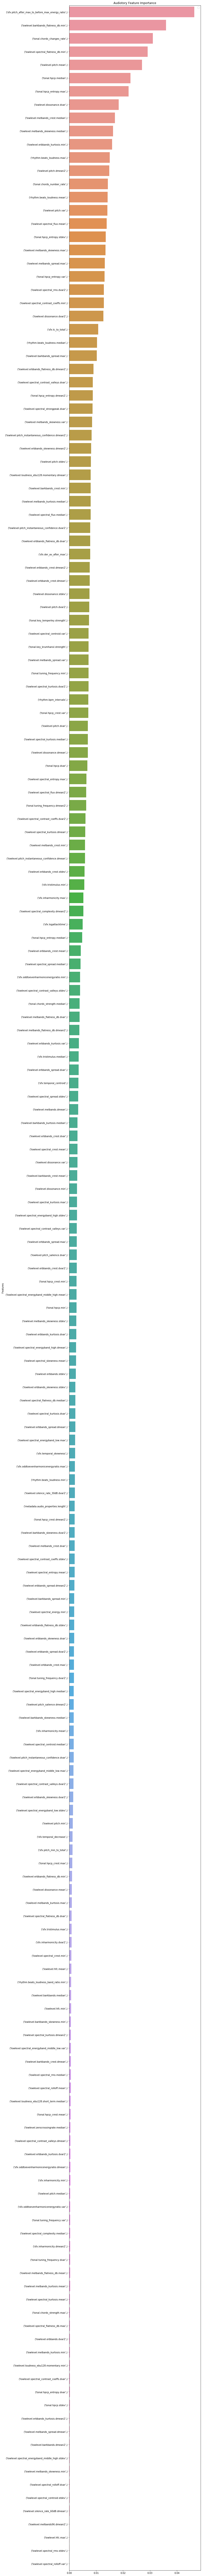

In [36]:
import pickle as pkl
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

print('load data...')
data = pkl.load(open("/Users/simonzimmermann/dev/random_forest_regressor/test_files_features.pkl", "rb"))
target_index = len(data.iloc[0]) - 1
x_input = data.iloc[:, : target_index - 1]
x_input = x_input.fillna(0)
target = pkl.load(open("/Users/simonzimmermann/dev/random_forest_regressor/datasets/vaillant_1/pkl/vaillant_1.pkl"))

x_train, x_test, y_train, y_test = train_test_split(x_input, target, test_size=0.3)

print('training regressor...')
regressor = RandomForestRegressor(n_estimators=100, max_depth=2, random_state=0)
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
print("score= " + str(regressor.score(x_test, y_test)))

print('plotting feature importance...')
feature_imp = pd.Series(regressor.feature_importances_, index=x_input.columns).sort_values(ascending=False)
feature_imp = feature_imp[feature_imp > 0]  
print(feature_imp)

a4_dims = (10, 200)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(ax=ax, x=feature_imp, y=feature_imp.index)
plt.title("Feature Importance Score")
plt.ylabel('Features')
plt.title("Audiotory Feature Importance")
plt.legend()


In [20]:
target

Unnamed: 1     32.6538461538462
Unnamed: 2                 36.5
Unnamed: 3     46.8653846153846
Unnamed: 4     72.8653846153846
Unnamed: 5     41.9615384615385
Unnamed: 6     69.6923076923077
Unnamed: 7     66.0961538461538
Unnamed: 8     67.7884615384615
Unnamed: 9     50.5769230769231
Unnamed: 10                  41
Unnamed: 11    45.8269230769231
Unnamed: 12    39.1730769230769
Unnamed: 13    46.2307692307692
Unnamed: 14    44.5384615384615
Unnamed: 15                51.5
Unnamed: 16    39.9423076923077
Unnamed: 17    41.3076923076923
Unnamed: 18    43.1923076923077
Unnamed: 19    39.1923076923077
Unnamed: 20    47.9423076923077
Unnamed: 21    45.5576923076923
Unnamed: 22    45.2692307692308
Unnamed: 23    43.8269230769231
Unnamed: 24    45.7115384615385
Name: 5, dtype: object